## > Описание задания
А/А-тестирование мобильного приложения. Необходимо посчитать результаты A/A-теста, проверяя метрику качества FPR (будем проверять на конверсии в покупку). Известно, что сплит-система сломана. Требуется проверить утверждение о поломке и найти ее причины, если сплит-система действительно сломана

## Описание колонок
experimentVariant – вариант эксперимента

version – версия приложения

purchase – факт покупки
## Задача
Запустите A/A-тест

Посчитайте FPR на уровне альфа = 0.05 (ставьте подвыборки без возвращения объемом 1000). Вы увидите, что FPR > альфа! Нам нужно наоборот – чтобы было меньше.

Найдите причины поломки сплит-системы, ориентируясь на результаты эксперимента (подсказка: найдите аномалию в версии приложения)

Напишите выводы, которые можно сделать на основе анализа результатов A/A-теста

In [9]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

In [11]:
hw_aa=pd.read_csv('hw_aa.csv', sep=';')

In [12]:
hw_aa

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0
...,...,...,...,...,...
127013,127014,d1f082ede77b17a99a9b0b240daf7bdf,0,v2.8.0,0
127014,127015,94f0d540830ccdc6b29c1938eea445cc,0,v2.8.0,0
127015,127016,709f74cf9721328e98be6f216e8a05a8,1,v2.9.0,0
127016,127017,1767ae3f8ffec269d9ed0ac0ede68d90,1,v2.8.0,0


In [13]:
hw_aa=hw_aa.rename(columns={"Unnamed: 0": "id"})
hw_aa

,id,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0
...,...,...,...,...,...
127013,127014,d1f082ede77b17a99a9b0b240daf7bdf,0,v2.8.0,0
127014,127015,94f0d540830ccdc6b29c1938eea445cc,0,v2.8.0,0
127015,127016,709f74cf9721328e98be6f216e8a05a8,1,v2.9.0,0
127016,127017,1767ae3f8ffec269d9ed0ac0ede68d90,1,v2.8.0,0


In [14]:
# А/А тест

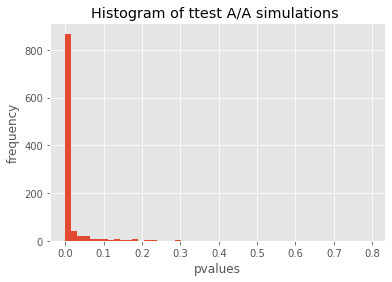

0.928

In [22]:
n = 100000
simulations = 1000
n_s = 1000
res = []
# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = hw_aa[hw_aa.experimentVariant==1]['purchase'].sample(n_s, replace = False).values
    s2 = hw_aa[hw_aa.experimentVariant==0]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [16]:
hw_aa.groupby(['experimentVariant','version'], as_index=False).agg({'purchase':'mean','id':'count'})

,experimentVariant,version,purchase,id
0,0,v2.8.0,0.000993,41283
1,0,v2.9.0,0.074658,11921
2,0,v3.7.4.0,0.059943,4204
3,0,v3.8.0.0,0.057604,5694
4,1,v2.8.0,0.045606,41552
5,1,v2.9.0,0.071304,12033
6,1,v3.7.4.0,0.063018,4221
7,1,v3.8.0.0,0.062848,6110


In [17]:
# А/А тест без v2.8.0

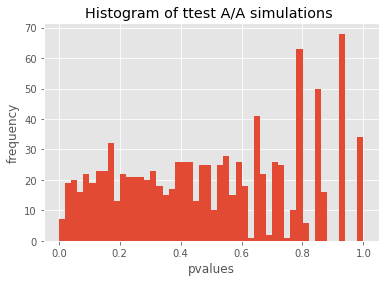

0.035

In [18]:
n = 100000
simulations = 1000
n_s = 1000
res = []
# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = hw_aa[(hw_aa.experimentVariant==1)&(hw_aa.version!='v2.8.0')]['purchase'].sample(n_s, replace = False).values
    s2 = hw_aa[(hw_aa.experimentVariant==0)&(hw_aa.version!='v2.8.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [19]:
# при проведении А/А теста мы видим, что в 93% случаев стат значимые различия, а группы А/А теста не должны быть 
# различными в связи с этим есть какието ошибки (анамалии).

In [20]:
# в расчете конверсии видно что в эксперементе "0" версией приложения v2.8.0 практически не пользуются и она равна 0.000993, 
# а в эсперементе "1" она равна 0.045606 и сдесь просматривается анамалия в связи с этим иключим v2.8.0 из А/А теста.

In [21]:
# после повторного проведения А/А теста мы видим, что тест прошел успешно соответственно это догазывает, что проблема в версии
# приложения v2.8.0 и в этом заключается причина поломки сплит-системы. 